EE467: Group Project 4 - Complete NILM Solution with Multiple Households
Step 1: Loading all appliance data...
  ✓ AC_1 (max power: 1906.8W)
  ✓ AC_4 (max power: 2450.0W)
  ✓ AC_3 (max power: 826.3W)
  ✓ AC_base (max power: 1806.0W)
  ✓ AC_2 (max power: 1470.2W)
  ✓ Iron_4 (max power: 974.2W)
  ✓ Iron_3 (max power: 1065.0W)
  ✓ Iron_1 (max power: 709.6W)
  ✓ Iron_5 (max power: 2111.1W)
  ✓ Iron_2 (max power: 613.2W)
  ✓ Kettle_1 (max power: 1246.0W)
  ✓ Fridge_1 (max power: 823.1W)
  ✓ Fridge_2 (max power: 85.0W)
  ✓ Fridge_3 (max power: 844.0W)
  ✓ Geyser_3 (max power: 2706.7W)
  ✓ Geyser_1 (max power: 4251.0W)
  ✓ Geyser_2 (max power: 3877.0W)
  ✓ Induction_3 (max power: 1008.3W)
  ✓ Induction_1 (max power: 1160.1W)
  ✓ Induction_4 (max power: 971.6W)
  ✓ Induction_5 (max power: 1831.4W)
  ✓ Induction_2 (max power: 1087.3W)
  ✓ Oven_6 (max power: 1367.0W)
  ✓ Oven_2 (max power: 1397.0W)
  ✓ Oven_1 (max power: 1476.0W)
  ✓ Oven_5 (max power: 1333.0W)
  ✓ Oven_3 (max power: 1353.0W)
  

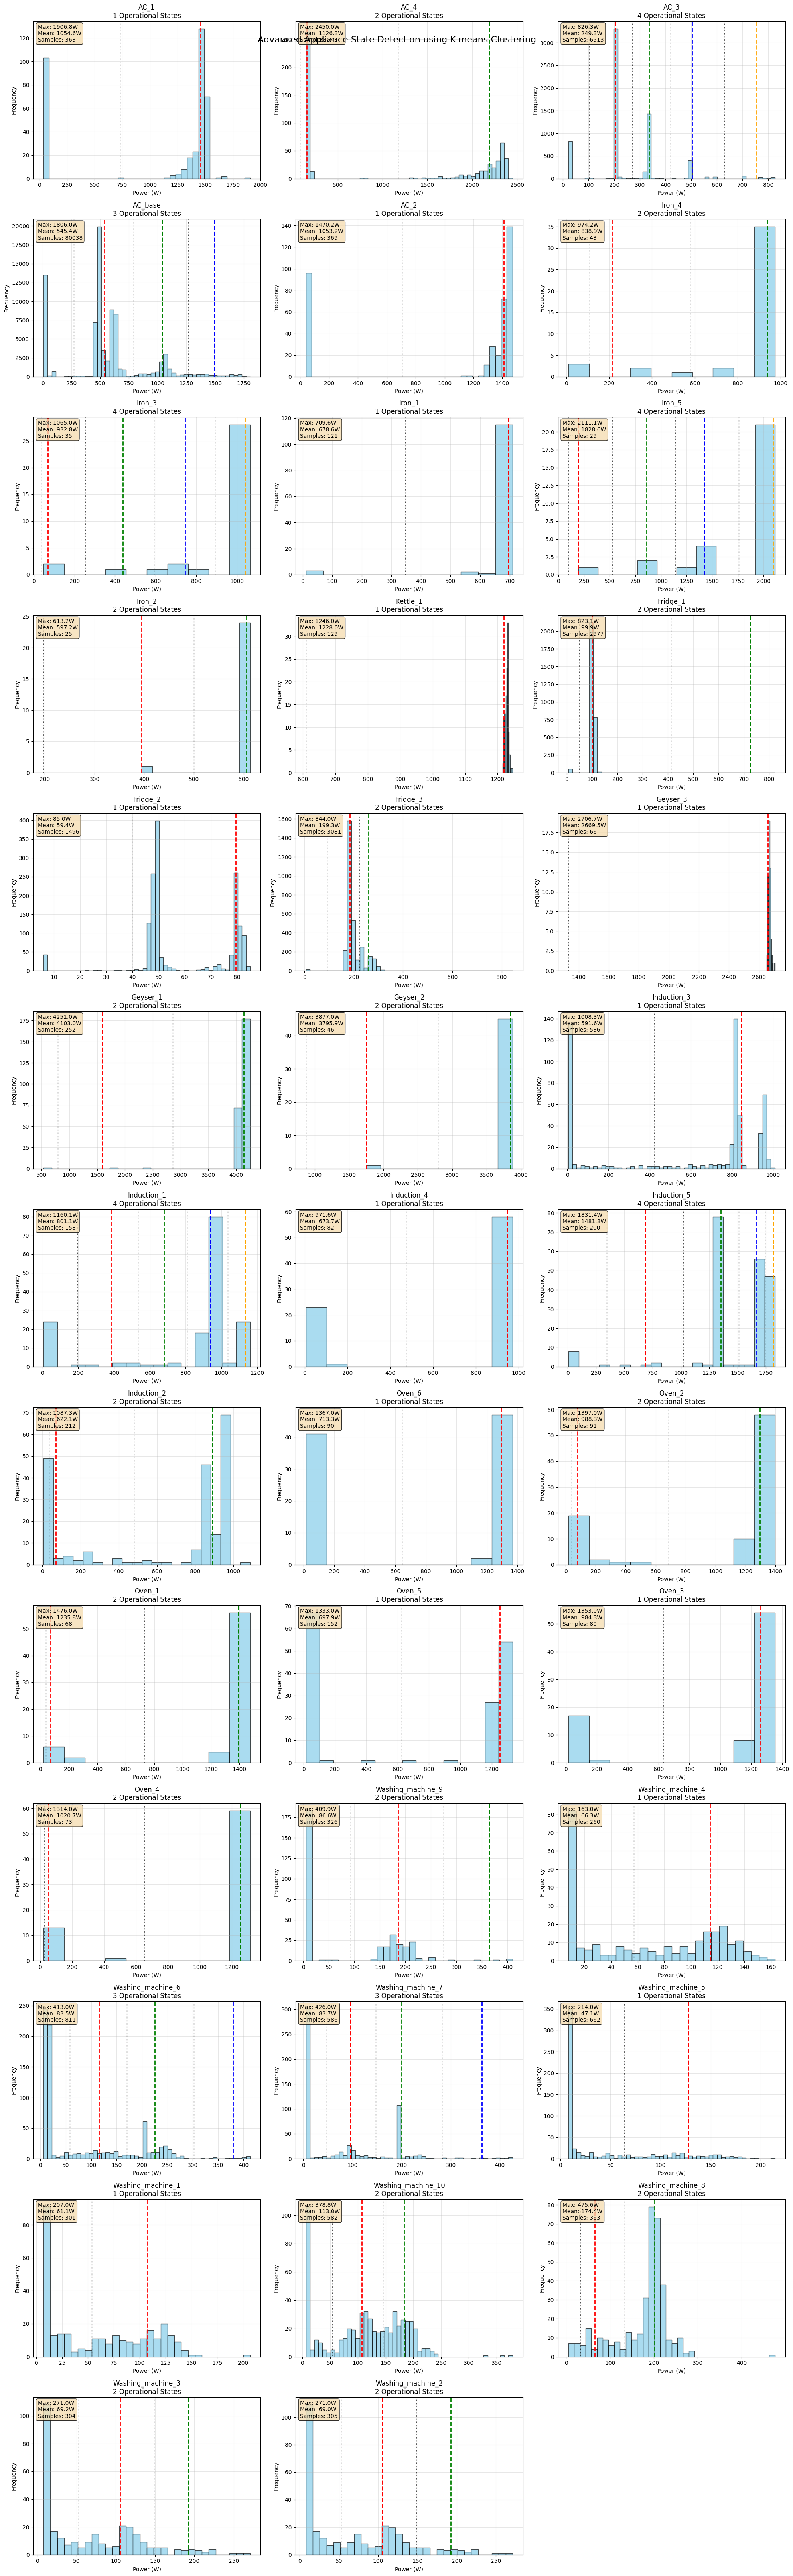


Step 3: Creating realistic household profiles with multiple households per type...
Generating 30 households for each of 3 household types
Total: 90 households over 30 days

Creating 30 Small_Apartment households...
  Household 0: Small_Apartment with 3 appliances: ['Fridge_3', 'AC_4', 'Washing_machine_4']
  Household 1: Small_Apartment with 4 appliances: ['Fridge_1', 'Kettle_1', 'Iron_5', 'AC_1']
  Household 2: Small_Apartment with 3 appliances: ['Fridge_1', 'Kettle_1', 'Washing_machine_3']
  Household 3: Small_Apartment with 2 appliances: ['Fridge_2', 'Iron_5']
  Household 4: Small_Apartment with 3 appliances: ['Fridge_1', 'Iron_3', 'Washing_machine_4']
  Household 5: Small_Apartment with 4 appliances: ['Fridge_2', 'Kettle_1', 'Iron_1', 'Washing_machine_1']
  Household 6: Small_Apartment with 1 appliances: ['Fridge_3']
  Household 7: Small_Apartment with 1 appliances: ['Fridge_1']
  Household 8: Small_Apartment with 4 appliances: ['Fridge_3', 'Kettle_1', 'AC_2', 'Washing_machine_9']


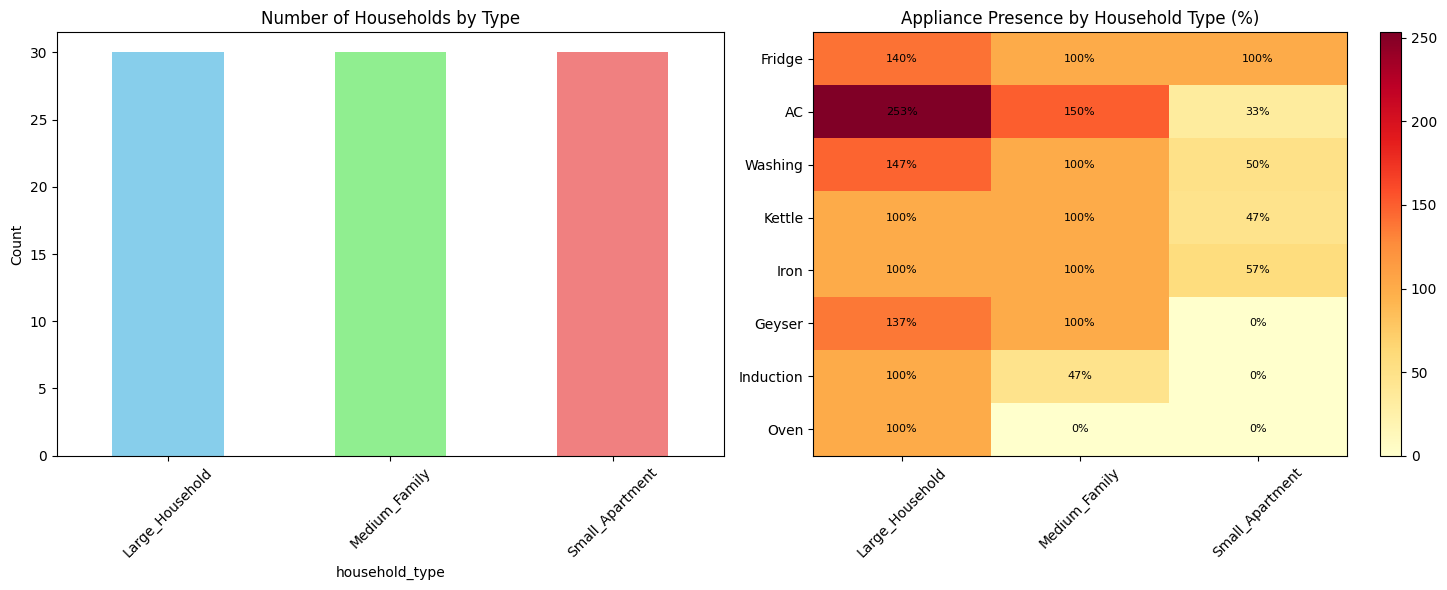

Total unique households: 90
Household diversity analysis completed!

Dataset Statistics:
Total samples: 1,555,200
Total households: 90
Household types: 3
Household variants per type: {'Large_Household': 30, 'Medium_Family': 30, 'Small_Apartment': 30}

Step 4: Creating features for machine learning...
Features shape: (1555200, 22)
Classification labels (appliance types): ['AC', 'Iron', 'Kettle', 'Fridge', 'Geyser', 'Induction', 'Oven', 'Washing_machine']
Regression labels (appliance types): ['AC', 'Iron', 'Kettle', 'Fridge', 'Geyser', 'Induction', 'Oven', 'Washing_machine']
Number of samples: 1555200
Step 4 Complete: Features created successfully

Step 5: Training classification model...
Training on: ['AC', 'Iron', 'Kettle', 'Fridge', 'Geyser', 'Induction', 'Oven', 'Washing_machine']
Training samples: 1088640, Test samples: 466560
Training households: 63, Test households: 27

Classification Results:
Overall Accuracy: 0.7939, F1-Score: 0.7113
  AC: Accuracy: 0.9901, F1: 0.9934
  Iron: Ac

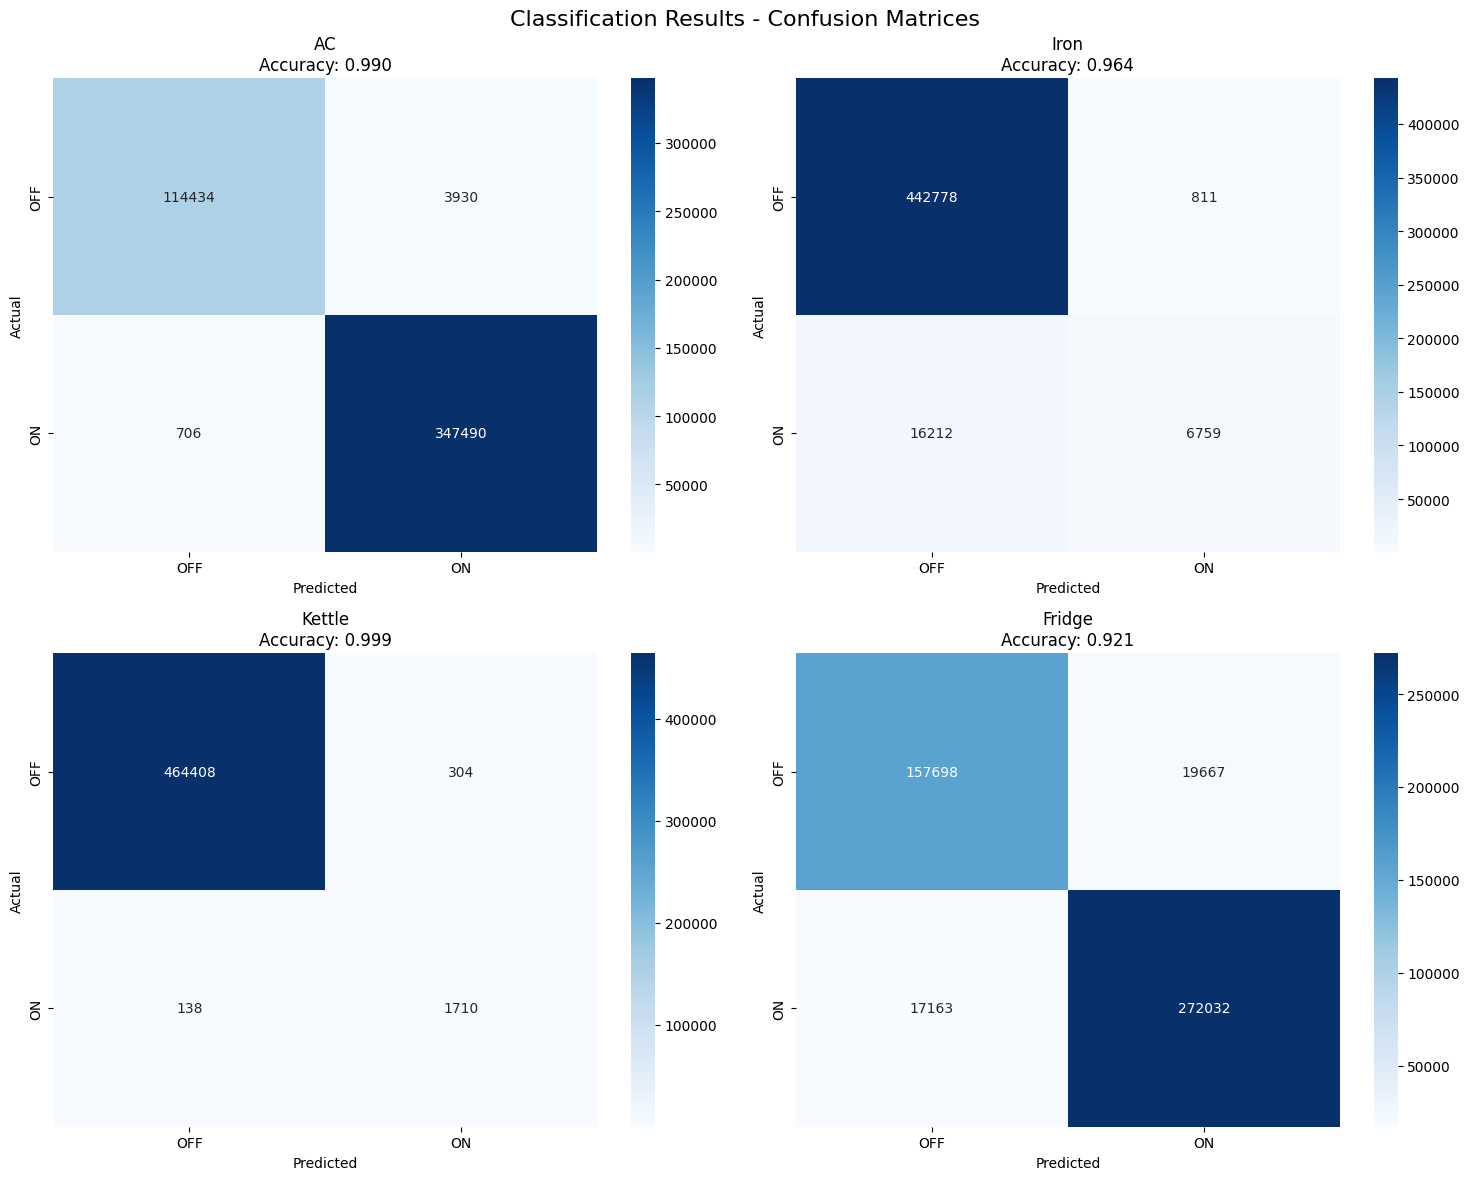

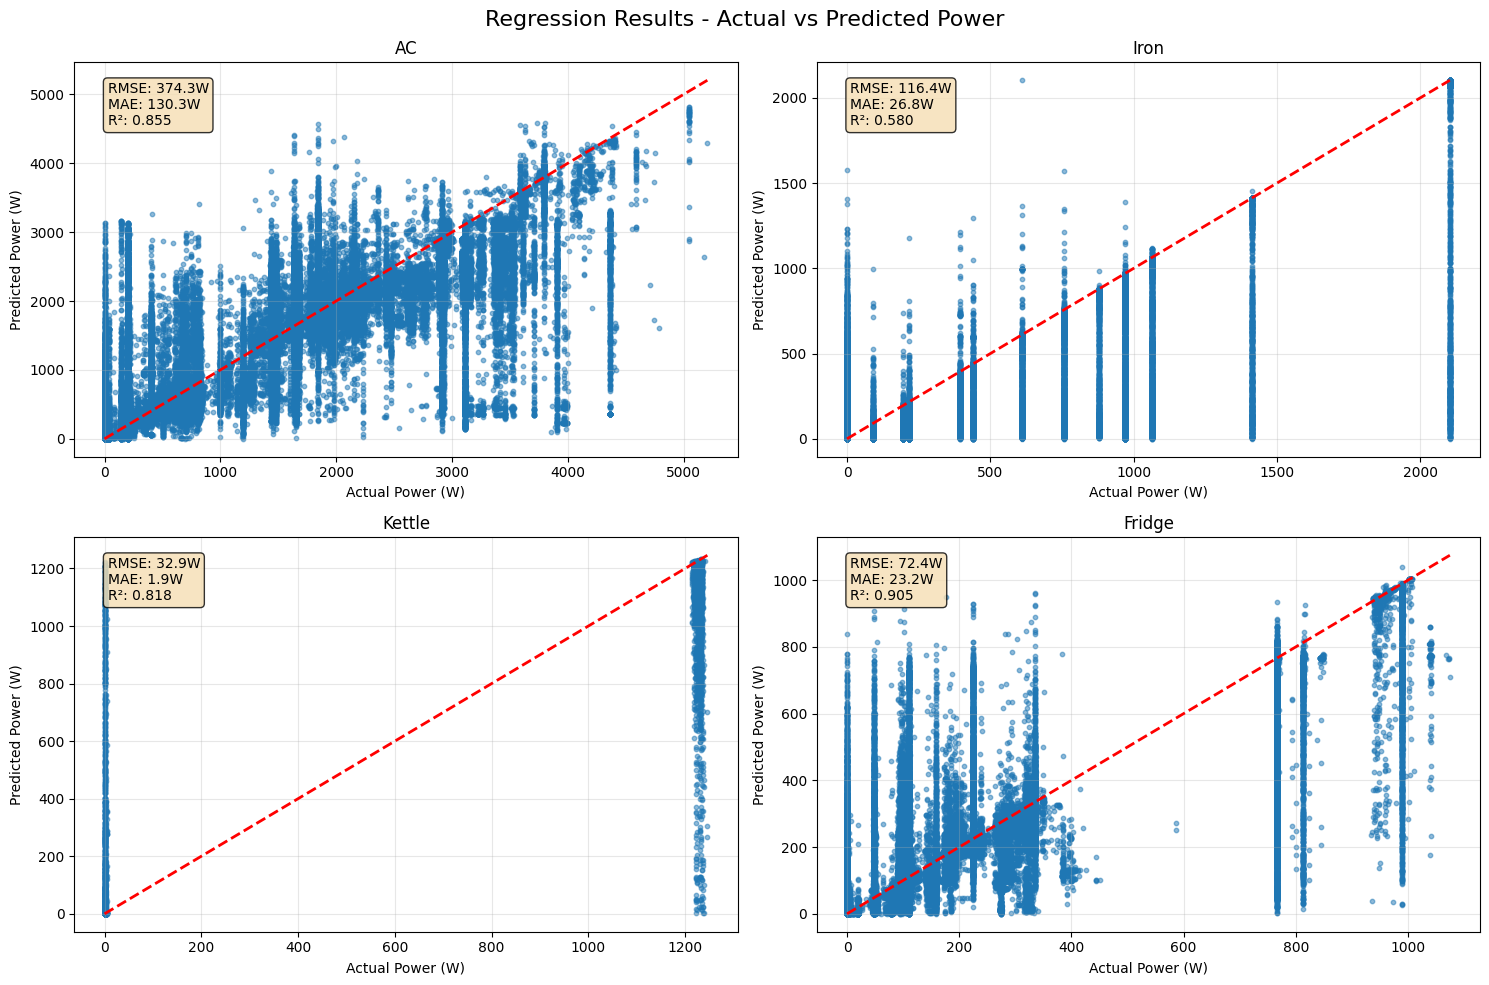

Step 7 Complete: Visualizations generated

PROJECT COMPLETED SUCCESSFULLY!
✓ Advanced state detection using K-means clustering
✓ Multiple households per type for better diversity
✓ 90 total households (30 per type) over 30 days
✓ Household diversity analysis completed
✓ Classification and regression models trained
✓ Comprehensive evaluation and visualization
✓ Classification: Accuracy = 0.7939, F1 = 0.7113
✓ Regression: RMSE = 160.56W, MAE = 42.22W, R² = 0.6624


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
from glob import glob
import warnings
from itertools import combinations, product
import random
from datetime import datetime, timedelta
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore')

class NILMProcessor:
    def __init__(self, data_path="NILM_appliance_level_data"):
        self.data_path = data_path
        self.appliances = {}
        self.appliance_states = {}  # Store state information for each appliance
        self.state_thresholds = {}  # Store power thresholds for each state
        self.aggregate_data = None
        self.features = None
        self.classification_labels = None
        self.regression_labels = None
        self.appliance_types = ['AC', 'Iron', 'Kettle', 'Fridge', 'Geyser', 'Induction', 'Oven', 'Washing_machine']
        
    def load_all_appliance_data(self):
        """Load all appliance data from CSV files"""
        print("Step 1: Loading all appliance data...")
        print("="*50)
        
        for appliance_type in self.appliance_types:
            appliance_files = glob(os.path.join(self.data_path, appliance_type, f"{appliance_type}_*.csv"))
            
            for file_path in appliance_files:
                if os.path.exists(file_path):
                    try:
                        df = pd.read_csv(file_path)
                        appliance_name = os.path.basename(file_path).replace('.csv', '')
                        
                        # Handle different timestamp formats
                        if 'timestamp' in df.columns:
                            df = df.drop('timestamp', axis=1)
                        
                        # Reset index to create sequential timestamps
                        df = df.reset_index(drop=True)
                        
                        # Standardize column names
                        if len(df.columns) >= 2:
                            df.columns = ['active_power', 'reactive_power']
                        else:
                            print(f"Skipping {appliance_name}: insufficient columns")
                            continue
                        
                        # Ensure numeric data types
                        df['active_power'] = pd.to_numeric(df['active_power'], errors='coerce')
                        df['reactive_power'] = pd.to_numeric(df['reactive_power'], errors='coerce')
                        df = df.fillna(0)
                        
                        # Remove completely zero data (no usage)
                        if df['active_power'].max() > 10:
                            self.appliances[appliance_name] = df
                            print(f"  ✓ {appliance_name} (max power: {df['active_power'].max():.1f}W)")
                        else:
                            print(f"  ✗ {appliance_name} (no significant usage)")
                            
                    except Exception as e:
                        print(f"Warning: Could not load {file_path}: {e}")
                        continue
        
        print(f"\nSuccessfully loaded {len(self.appliances)} appliances")
        print("Step 1 Complete: All appliance data loaded successfully")
        print("="*50)
    
    def detect_appliance_states_advanced(self):
        """
        Advanced state detection using histogram visualization and K-means clustering
        """
        print("\nStep 2: Advanced appliance state detection...")
        print("="*50)
        
        for appliance_name, df in self.appliances.items():
            active_power = df['active_power'].values
            
            # Filter out zero and near-zero values for better state analysis
            non_zero_power = active_power[active_power > 5]
            
            if len(non_zero_power) == 0:
                print(f"  No significant power consumption for {appliance_name}")
                self.appliance_states[appliance_name] = [0]
                self.state_thresholds[appliance_name] = []
                continue
            
            # Determine optimal number of clusters using silhouette score
            best_k = 1
            best_score = -1
            
            # Try different numbers of clusters (1 to 5, but not more than data points)
            max_clusters = min(5, len(non_zero_power) - 1)
            
            for k in range(2, max_clusters + 1):
                if k >= len(non_zero_power):
                    continue
                    
                kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
                labels = kmeans.fit_predict(non_zero_power.reshape(-1, 1))
                
                # Calculate silhouette score
                try:
                    score = silhouette_score(non_zero_power.reshape(-1, 1), labels)
                    if score > best_score:
                        best_score = score
                        best_k = k
                except:
                    continue
            
            # If no good clusters found or only one cluster, use basic approach
            if best_k == 1 or best_score < 0.4:
                # Use basic threshold-based approach
                mean_power = np.mean(non_zero_power)
                std_power = np.std(non_zero_power)
                
                if std_power < mean_power * 0.3:  # Low variance - single state
                    states = [0, mean_power]
                    thresholds = [mean_power / 2]
                else:  # High variance - try to find natural breaks
                    # Use percentiles to find states
                    q25 = np.percentile(non_zero_power, 25)
                    q75 = np.percentile(non_zero_power, 75)
                    states = [0, q25, q75]
                    thresholds = [(q25 + q75) / 2]
            else:
                # Use K-means with optimal cluster count
                kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
                labels = kmeans.fit_predict(non_zero_power.reshape(-1, 1))
                centers = kmeans.cluster_centers_.flatten()
                centers = np.sort(centers)
                
                # Determine state thresholds (midpoints between centers)
                thresholds = []
                if len(centers) > 1:
                    for i in range(len(centers) - 1):
                        threshold = (centers[i] + centers[i + 1]) / 2
                        thresholds.append(threshold)
                
                states = [0] + centers.tolist()  # Include OFF state
            
            # Ensure states are reasonable (not too close together)
            min_state_diff = 50  # Minimum difference between states in watts
            filtered_states = [states[0]]  # Start with OFF state
            for state in states[1:]:
                if state - filtered_states[-1] >= min_state_diff:
                    filtered_states.append(state)
            
            # Update thresholds based on filtered states
            filtered_thresholds = []
            if len(filtered_states) > 1:
                for i in range(len(filtered_states) - 1):
                    threshold = (filtered_states[i] + filtered_states[i + 1]) / 2
                    filtered_thresholds.append(threshold)
            
            self.appliance_states[appliance_name] = filtered_states
            self.state_thresholds[appliance_name] = filtered_thresholds
            
            print(f"  {appliance_name}: {len(filtered_states)} states at {[f'{s:.1f}W' for s in filtered_states]}")
        
        print("\nStep 2 Complete: Advanced state detection completed")
        print("="*50)
        
        return self.appliance_states, self.state_thresholds
    
    def visualize_state_analysis(self):
        """Create comprehensive visualization of state analysis"""
        print("\nCreating state analysis visualizations...")
        
        n_appliances = len(self.appliances)
        n_cols = 3
        n_rows = (n_appliances + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
        if n_rows == 1:
            axes = axes.ravel() if n_cols > 1 else [axes]
        else:
            axes = axes.ravel()
        
        appliance_names = list(self.appliances.keys())
        
        for idx, appliance_name in enumerate(appliance_names):
            if idx >= len(axes):
                break
                
            df = self.appliances[appliance_name]
            active_power = df['active_power'].values
            states = self.appliance_states.get(appliance_name, [0])
            thresholds = self.state_thresholds.get(appliance_name, [])
            
            # Filter out zero power for better visualization
            non_zero_power = active_power[active_power > 5]
            
            if len(non_zero_power) == 0:
                axes[idx].text(0.5, 0.5, 'No significant\npower consumption', 
                              ha='center', va='center', transform=axes[idx].transAxes)
                axes[idx].set_title(f'{appliance_name}')
                continue
            
            # Create histogram
            n_bins = min(50, len(non_zero_power) // 10)
            n_bins = max(n_bins, 10)
            
            axes[idx].hist(non_zero_power, bins=n_bins, alpha=0.7, 
                          color='skyblue', edgecolor='black')
            axes[idx].set_xlabel('Power (W)')
            axes[idx].set_ylabel('Frequency')
            axes[idx].set_title(f'{appliance_name}\n{len(states)-1} Operational States')
            axes[idx].grid(True, alpha=0.3)
            
            # Plot state centers and thresholds
            colors = ['red', 'green', 'blue', 'orange', 'purple']
            for i, state in enumerate(states[1:]):  # Skip OFF state
                color = colors[i % len(colors)]
                axes[idx].axvline(x=state, color=color, linestyle='--', 
                                linewidth=2, label=f'State {i+1}: {state:.1f}W')
            
            for i, threshold in enumerate(thresholds):
                axes[idx].axvline(x=threshold, color='black', linestyle=':', 
                                linewidth=1, alpha=0.7, label=f'Threshold {i+1}')
            
            # Add statistics
            stats_text = f'Max: {np.max(active_power):.1f}W\nMean: {np.mean(non_zero_power):.1f}W\nSamples: {len(non_zero_power)}'
            axes[idx].text(0.02, 0.98, stats_text, transform=axes[idx].transAxes, 
                          verticalalignment='top',
                          bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
            
            # Limit legend entries
            if len(axes[idx].get_legend_handles_labels()[0]) > 4:
                axes[idx].legend().remove()
        
        # Hide empty subplots
        for idx in range(len(appliance_names), len(axes)):
            axes[idx].set_visible(False)
        
        plt.suptitle('Advanced Appliance State Detection using K-means Clustering', 
                    fontsize=16, y=0.98)
        plt.tight_layout()
        plt.show()
    
    def get_appliance_state(self, appliance_name, power_value):
        """Determine the state of an appliance based on power value"""
        if appliance_name not in self.appliance_states:
            return 0  # OFF state
        
        states = self.appliance_states[appliance_name]
        thresholds = self.state_thresholds.get(appliance_name, [])
        
        # If no thresholds or only OFF state, return simple ON/OFF
        if not thresholds or len(states) <= 1:
            return 1 if power_value > 10 else 0
        
        # Determine state based on thresholds
        state = 0  # Start with OFF state
        for i, threshold in enumerate(thresholds):
            if power_value > threshold:
                state = i + 1
        
        return state
    
    def get_realistic_usage_probability(self, hour, appliance_type):
        """Define realistic usage probabilities based on time of day"""
        base_probabilities = {
            'AC': 0.3, 'Fridge': 0.8, 'Kettle': 0.2, 'Iron': 0.1,
            'Washing_machine': 0.15, 'Oven': 0.1, 'Geyser': 0.2, 'Induction': 0.15
        }
        
        time_adjustments = {
            'AC': {**{h: 0.8 for h in [12, 13, 14, 15, 16]}, 
                   **{h: 0.1 for h in [0, 1, 2, 3, 4, 5]},
                   **{h: 0.5 for h in [20, 21, 22]}},
            
            'Fridge': {h: 0.9 for h in range(24)},
            
            'Kettle': {**{h: 0.4 for h in [7, 8, 18, 19]}, 
                       **{h: 0.05 for h in [0, 1, 2, 3, 4, 5]}},
            
            'Iron': {**{h: 0.3 for h in [8, 9, 18, 19]}, 
                     **{h: 0.0 for h in [0, 1, 2, 3, 4, 5]}},
            
            'Washing_machine': {**{h: 0.3 for h in [9, 10, 15, 16, 19, 20]}, 
                                **{h: 0.0 for h in [0, 1, 2, 3, 4, 5]}},
            
            'Oven': {**{h: 0.25 for h in [12, 13, 19, 20]}, 
                     **{h: 0.0 for h in [0, 1, 2, 3, 4, 5]}},
            
            'Geyser': {**{h: 0.4 for h in [6, 7, 20, 21]}, 
                       **{h: 0.1 for h in range(24)}},
            
            'Induction': {**{h: 0.3 for h in [12, 13, 19, 20]}, 
                          **{h: 0.0 for h in [0, 1, 2, 3, 4, 5]}}
        }
        
        base_prob = base_probabilities.get(appliance_type, 0.1)
        adjustment = time_adjustments.get(appliance_type, {}).get(hour, 1.0)
        
        return base_prob * adjustment
    
    def simulate_multi_state_appliance(self, appliance_name, current_state, duration, time_idx, df):
        """Simulate multi-state appliance operation with state transitions"""
        states = self.appliance_states.get(appliance_name, [0])
        
        if len(states) <= 2:  # Single-state or simple ON/OFF appliance
            if current_state > 0:  # Currently ON
                if np.random.random() < 0.02:  # Small chance to turn OFF
                    return 0, 0, 0
                else:
                    data_idx = min(time_idx, len(df) - 1)
                    power = df.iloc[data_idx]['active_power']
                    reactive = df.iloc[data_idx]['reactive_power']
                    state = 1 if power > 10 else 0
                    return power, reactive, state
            else:  # Currently OFF
                if np.random.random() < 0.1:  # Chance to turn ON
                    data_idx = min(time_idx, len(df) - 1)
                    power = df.iloc[data_idx]['active_power']
                    reactive = df.iloc[data_idx]['reactive_power']
                    state = 1 if power > 10 else 0
                    return power, reactive, state
                else:
                    return 0, 0, 0
        
        else:  # Multi-state appliance
            if current_state > 0:  # Currently in some state
                # After reasonable duration, consider state change
                if duration > len(states) * 5:  
                    if np.random.random() < 0.1:  # Chance to change state
                        if np.random.random() < 0.3:  # 30% chance to turn OFF
                            return 0, 0, 0
                        else:
                            # Transition to another state
                            available_states = [s for s in range(1, len(states)) if s != current_state]
                            if available_states:
                                new_state = random.choice(available_states)
                                target_power = states[new_state]
                                
                                # Find sample with similar power level
                                similar_samples = df[np.abs(df['active_power'] - target_power) < 50]
                                if len(similar_samples) > 0:
                                    sample = similar_samples.iloc[0]
                                    return sample['active_power'], sample['reactive_power'], new_state
                                else:
                                    return target_power, 0, new_state
                            else:
                                return 0, 0, 0
                    else:
                        # Stay in current state
                        data_idx = min(time_idx, len(df) - 1)
                        power = df.iloc[data_idx]['active_power']
                        reactive = df.iloc[data_idx]['reactive_power']
                        current_state_actual = self.get_appliance_state(appliance_name, power)
                        return power, reactive, current_state_actual
                else:
                    # Continue in current state
                    data_idx = min(time_idx, len(df) - 1)
                    power = df.iloc[data_idx]['active_power']
                    reactive = df.iloc[data_idx]['reactive_power']
                    current_state_actual = self.get_appliance_state(appliance_name, power)
                    return power, reactive, current_state_actual
            else:  # Currently OFF
                appliance_parts = appliance_name.split('_')
                appliance_type = appliance_parts[0] if len(appliance_parts) >= 1 else appliance_name
                current_hour = (time_idx * 5) // 3600
                usage_prob = self.get_realistic_usage_probability(current_hour, appliance_type)
                
                if np.random.random() < usage_prob:  # Chance to start operation
                    # Start with a random state (excluding OFF)
                    available_states = list(range(1, len(states)))
                    if available_states:
                        new_state = random.choice(available_states)
                        target_power = states[new_state]
                        
                        similar_samples = df[np.abs(df['active_power'] - target_power) < 50]
                        if len(similar_samples) > 0:
                            sample = similar_samples.iloc[0]
                            return sample['active_power'], sample['reactive_power'], new_state
                        else:
                            return target_power, 0, new_state
                    else:
                        return 0, 0, 0
                else:
                    return 0, 0, 0
    
    def create_realistic_households(self, num_days=30, samples_per_day=17280, households_per_type=5):
        """
        Create realistic household aggregate profiles with multiple households per type
        
        Documentation:
        - Generates multiple households for each household type to increase diversity
        - Each household has different appliance combinations and usage patterns
        - This creates more diverse training data for better model generalization
        """
        print("\nStep 3: Creating realistic household profiles with multiple households per type...")
        print("="*50)
        print(f"Generating {households_per_type} households for each of 3 household types")
        print(f"Total: {households_per_type * 3} households over {num_days} days")
        
        household_configs = [
            {
                'type': 'Small_Apartment',
                'appliance_options': {
                    'Fridge': [1],  # Always have fridge
                    'Kettle': [0, 1],  # 50% chance
                    'Iron': [0, 1],   # 50% chance
                    'AC': [0, 1],     # 50% chance in small apartment
                    'Washing_machine': [0, 1]  # 50% chance
                },
                'description': 'Small apartments with varying appliance combinations'
            },
            {
                'type': 'Medium_Family',
                'appliance_options': {
                    'Fridge': [1],      # Always have fridge
                    'AC': [1, 2],       # 1 or 2 ACs
                    'Geyser': [1],      # Always have geyser
                    'Iron': [1],        # Always have iron
                    'Kettle': [1],      # Always have kettle
                    'Washing_machine': [1],  # Always have washing machine
                    'Induction': [0, 1] # 50% chance
                },
                'description': 'Medium family homes with consistent core appliances'
            },
            {
                'type': 'Large_Household', 
                'appliance_options': {
                    'AC': [2, 3],           # 2 or 3 ACs
                    'Fridge': [1, 2],       # 1 or 2 fridges
                    'Geyser': [1, 2],       # 1 or 2 geysers
                    'Induction': [1],       # Always have induction
                    'Iron': [1],            # Always have iron
                    'Kettle': [1],          # Always have kettle
                    'Oven': [1],            # Always have oven
                    'Washing_machine': [1, 2]  # 1 or 2 washing machines
                },
                'description': 'Large households with multiple appliances'
            }
        ]
        
        scenarios_data = []
        household_id = 0
        
        for config in household_configs:
            print(f"\nCreating {households_per_type} {config['type']} households...")
            
            for household_num in range(households_per_type):
                # Randomly select appliances for this specific household
                household_appliances = []
                
                for appliance_type, count_options in config['appliance_options'].items():
                    count = random.choice(count_options)
                    if count > 0:
                        available_appliances = [a for a in self.appliances.keys() if a.startswith(appliance_type)]
                        if available_appliances:
                            # Randomly select specific appliance models
                            selected = random.sample(available_appliances, min(count, len(available_appliances)))
                            household_appliances.extend(selected)
                
                if len(household_appliances) == 0:
                    continue
                
                print(f"  Household {household_id}: {config['type']} with {len(household_appliances)} appliances: {household_appliances}")
                
                # Initialize appliance states and durations
                appliance_power = {appliance: 0 for appliance in household_appliances}
                appliance_states = {appliance: 0 for appliance in household_appliances}
                state_durations = {appliance: 0 for appliance in household_appliances}
                
                # Generate data for one day
                for sample_idx in range(samples_per_day):
                    current_hour = (sample_idx * 5) // 3600
                    
                    scenario_row = {
                        'timestamp': sample_idx * 5,
                        'day_of_week': household_num % 7,  # Different days for different households
                        'hour_of_day': current_hour,
                        'household_id': household_id,
                        'household_type': config['type'],
                        'day_number': household_num % num_days,
                        'household_variant': household_num  # Track which variant of this type
                    }
                    
                    aggregate_active = 0
                    aggregate_reactive = 0
                    
                    # Process each appliance with state-based operation
                    for appliance in household_appliances:
                        df = self.appliances[appliance]
                        current_power = appliance_power[appliance]
                        current_state = appliance_states[appliance]
                        duration = state_durations[appliance]
                        
                        # Simulate appliance operation with state transitions
                        active_power, reactive_power, new_state = self.simulate_multi_state_appliance(
                            appliance, current_state, duration, sample_idx, df
                        )
                        
                        # Update appliance state
                        appliance_power[appliance] = active_power
                        appliance_states[appliance] = new_state
                        if new_state > 0:
                            state_durations[appliance] += 1
                        else:
                            state_durations[appliance] = 0
                        
                        scenario_row[f'{appliance}_active'] = active_power
                        scenario_row[f'{appliance}_reactive'] = reactive_power
                        scenario_row[f'{appliance}_state'] = new_state
                        
                        aggregate_active += active_power
                        aggregate_reactive += reactive_power
                    
                    scenario_row['aggregate_active'] = aggregate_active
                    scenario_row['aggregate_reactive'] = aggregate_reactive
                    scenarios_data.append(scenario_row)
                
                household_id += 1
        
        scenarios_df = pd.DataFrame(scenarios_data)
        scenarios_df = scenarios_df.fillna(0)
        
        self.aggregate_data = scenarios_df
        
        print(f"\nStep 3 Complete: Generated {len(scenarios_df)} samples")
        print(f"Total households: {household_id}")
        print(f"Household types distribution:")
        for config in household_configs:
            count = len(scenarios_df[scenarios_df['household_type'] == config['type']]['household_id'].unique())
            print(f"  {config['type']}: {count} households")
        print(f"Time period: {num_days} days")
        print("="*50)
        
        return scenarios_df
    
    def create_features_for_ml(self, window_size=6):
        """Create features for machine learning models"""
        print("\nStep 4: Creating features for machine learning...")
        print("="*50)
        
        df = self.aggregate_data.copy()
        
        # Basic aggregate features
        features = ['aggregate_active', 'aggregate_reactive']
        
        # Time-based features
        df['minute_of_day'] = (df['timestamp'] // 60) % 1440
        df['sin_hour'] = np.sin(2 * np.pi * df['hour_of_day'] / 24)
        df['cos_hour'] = np.cos(2 * np.pi * df['hour_of_day'] / 24)
        df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
        
        features.extend(['minute_of_day', 'sin_hour', 'cos_hour', 'is_weekend'])
        
        # Statistical features on aggregate power
        df['active_rolling_mean'] = df['aggregate_active'].rolling(window=window_size, center=True).mean()
        df['active_rolling_std'] = df['aggregate_active'].rolling(window=window_size, center=True).std()
        df['active_diff'] = df['aggregate_active'].diff()
        df['reactive_diff'] = df['aggregate_reactive'].diff()
        
        # === ENHANCED FEATURES FOR APPLIANCE SIGNATURE DETECTION ===
        
        # Statistical moments (fixed)
        df['active_rolling_skew'] = df['aggregate_active'].rolling(window=window_size).skew()
        df['active_rolling_kurtosis'] = df['aggregate_active'].rolling(window=window_size).kurt()  # FIXED: .kurt() instead of .kurtosis()
        
        # Power-based features that might help identify appliance types
        df['active_to_reactive_ratio'] = np.where(df['aggregate_reactive'] != 0, 
                                                df['aggregate_active'] / df['aggregate_reactive'], 0)
        df['power_magnitude'] = np.sqrt(df['aggregate_active']**2 + df['aggregate_reactive']**2)
        
        # State-aware features
        df['power_variance'] = df['aggregate_active'].rolling(window=window_size).var()
        df['state_change_indicator'] = (df['active_diff'].abs() > 50).astype(int)
        df['power_level_category'] = pd.cut(df['aggregate_active'], 
                                        bins=[0, 10, 100, 500, 1000, 5000], 
                                        labels=[0, 1, 2, 3, 4]).astype(float)
        
        # === NEW: EVENT-BASED FEATURES ===
        # Event detection
        df['event_onset'] = self._detect_event_onset(df['aggregate_active'])
        df['event_magnitude'] = self._calculate_event_magnitude(df['aggregate_active'])
        
        # Transient characteristics
        df['power_rise_time'] = self._calculate_rise_time(df['aggregate_active'])
        df['power_fall_time'] = self._calculate_fall_time(df['aggregate_active'])
        
        # Load characteristics
        df['power_factor_estimate'] = self._estimate_power_factor(df['aggregate_active'], df['aggregate_reactive'])
        
        features.extend([
            'active_rolling_mean', 'active_rolling_std', 'active_diff', 'reactive_diff',
            'active_rolling_skew', 'active_rolling_kurtosis',  # Statistical moments
            'active_to_reactive_ratio', 'power_magnitude',
            'power_variance', 'state_change_indicator', 'power_level_category',
            'event_onset', 'event_magnitude',  # Event features
            'power_rise_time', 'power_fall_time',  # Transient features
            'power_factor_estimate'  # Load characteristics
        ])
        
        # Fill NaN values
        df = df.fillna(method='bfill').fillna(method='ffill').fillna(0)
        
        self.features = df[features]
        
        # Create appliance-type level labels (not specific model level)
        classification_labels = {}
        regression_labels = {}
        
        # Group by appliance type rather than specific model
        for appliance_type in self.appliance_types:
            appliance_columns = [col for col in df.columns 
                            if col.startswith(appliance_type) and '_active' in col and '_reactive' not in col]
            
            if appliance_columns:
                # Classification: Any appliance of this type is ON
                type_on = pd.Series(np.zeros(len(df)), dtype=int)
                for col in appliance_columns:
                    type_on = type_on | (df[col] > 10).astype(int)
                classification_labels[appliance_type] = type_on
                
                # Regression: Total power for this appliance type
                type_power = pd.Series(np.zeros(len(df)), dtype=float)
                for col in appliance_columns:
                    type_power += df[col]
                regression_labels[appliance_type] = type_power
        
        self.classification_labels = pd.DataFrame(classification_labels)
        self.regression_labels = pd.DataFrame(regression_labels)
        
        print(f"Features shape: {self.features.shape}")
        print(f"Classification labels (appliance types): {list(classification_labels.keys())}")
        print(f"Regression labels (appliance types): {list(regression_labels.keys())}")
        print(f"Number of samples: {len(df)}")
        print("Step 4 Complete: Features created successfully")
        print("="*50)
        
        return df[features], self.classification_labels, self.regression_labels

    # Add these helper methods to the class:

    def _detect_event_onset(self, power_series, threshold=30):
        """Detect when significant power events start"""
        diff = power_series.diff()
        event_onset = (diff.abs() > threshold).astype(int)
        return event_onset

    def _calculate_event_magnitude(self, power_series, window=10):
        """Calculate magnitude of power events"""
        rolling_mean = power_series.rolling(window=window).mean()
        event_magnitude = power_series - rolling_mean.shift(window)
        return event_magnitude.fillna(0)

    def _calculate_rise_time(self, power_series, threshold=20):
        """Calculate how quickly power rises when appliances turn on"""
        diff = power_series.diff()
        rise_mask = diff > threshold
        rise_times = rise_mask.astype(int)
        return rise_times.rolling(window=5, min_periods=1).sum().fillna(0)

    def _calculate_fall_time(self, power_series, threshold=20):
        """Calculate how quickly power falls when appliances turn off"""
        diff = power_series.diff()
        fall_mask = diff < -threshold
        fall_times = fall_mask.astype(int)
        return fall_times.rolling(window=5, min_periods=1).sum().fillna(0)

    def _estimate_power_factor(self, active_power, reactive_power):
        """Estimate power factor to identify load types"""
        with np.errstate(divide='ignore', invalid='ignore'):
            power_factor = active_power / np.sqrt(active_power**2 + reactive_power**2)
        return power_factor.fillna(0)

    def _calculate_spike_duration(self, power_series, threshold=50):
        """Detect duration of power spikes"""
        above_threshold = power_series > threshold
        spike_groups = (above_threshold != above_threshold.shift()).cumsum()
        spike_durations = above_threshold.groupby(spike_groups).transform('count')
        return spike_durations


    def _calculate_event_duration(self, power_series, threshold=10):
        """Estimate duration of power events"""
        above_threshold = power_series > threshold
        event_groups = (above_threshold != above_threshold.shift()).cumsum()
        event_durations = above_threshold.groupby(event_groups).transform('count')
        return event_durations

    def _detect_cycle_periodicity(self, power_series, max_lag=50):
        """Detect periodic patterns in power consumption"""
        # Simple autocorrelation at lag 1
        shifted = power_series.shift(1).fillna(0)
        correlation = power_series.corr(shifted)
        return abs(correlation)

    def _calculate_state_complexity(self, power_series, window=20):
        """Calculate complexity of state sequences"""
        diff = power_series.diff().abs()
        state_changes = (diff > 10).rolling(window=window).sum()
        return state_changes / window  # Normalize

    def _classify_load_type(self, active_power, reactive_power):
        """Classify load type based on active/reactive power ratio"""
        with np.errstate(divide='ignore', invalid='ignore'):
            ratio = reactive_power / active_power
        # 0: Resistive (ratio ~ 0), 1: Inductive (ratio > 0), 2: Capacitive (ratio < 0)
        load_type = np.zeros_like(ratio)
        load_type[ratio > 0.1] = 1   # Inductive
        load_type[ratio < -0.1] = 2  # Capacitive
        return load_type
    
    def analyze_household_diversity(self):
        """Analyze and visualize the diversity of generated households"""
        if self.aggregate_data is None:
            return
        
        print("\nAnalyzing household diversity...")
        
        # Count households by type
        household_counts = self.aggregate_data.groupby('household_type')['household_id'].nunique()
        
        # Analyze appliance distribution across households
        appliance_columns = [col for col in self.aggregate_data.columns 
                           if any(appliance in col for appliance in self.appliance_types) 
                           and '_active' in col and '_reactive' not in col]
        
        appliance_presence = {}
        for household_id in self.aggregate_data['household_id'].unique():
            household_data = self.aggregate_data[self.aggregate_data['household_id'] == household_id]
            household_type = household_data['household_type'].iloc[0]
            
            for appliance_col in appliance_columns:
                appliance_type = appliance_col.split('_')[0]
                if appliance_type not in appliance_presence:
                    appliance_presence[appliance_type] = {}
                if household_type not in appliance_presence[appliance_type]:
                    appliance_presence[appliance_type][household_type] = 0
                
                # Check if appliance is ever used in this household
                if household_data[appliance_col].max() > 10:
                    appliance_presence[appliance_type][household_type] += 1
        
        # Create visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Plot 1: Household counts by type
        household_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'lightgreen', 'lightcoral'])
        ax1.set_title('Number of Households by Type')
        ax1.set_ylabel('Count')
        ax1.tick_params(axis='x', rotation=45)
        
        # Plot 2: Appliance presence heatmap
        presence_matrix = []
        appliance_types = list(appliance_presence.keys())
        household_types = list(household_counts.index)
        
        for appliance in appliance_types:
            row = []
            for household_type in household_types:
                count = appliance_presence[appliance].get(household_type, 0)
                total = household_counts[household_type]
                percentage = (count / total) * 100 if total > 0 else 0
                row.append(percentage)
            presence_matrix.append(row)
        
        im = ax2.imshow(presence_matrix, cmap='YlOrRd', aspect='auto')
        ax2.set_xticks(range(len(household_types)))
        ax2.set_yticks(range(len(appliance_types)))
        ax2.set_xticklabels(household_types, rotation=45)
        ax2.set_yticklabels(appliance_types)
        ax2.set_title('Appliance Presence by Household Type (%)')
        
        # Add percentage labels
        for i in range(len(appliance_types)):
            for j in range(len(household_types)):
                text = ax2.text(j, i, f'{presence_matrix[i][j]:.0f}%',
                               ha="center", va="center", color="black", fontsize=8)
        
        plt.colorbar(im, ax=ax2)
        plt.tight_layout()
        plt.show()
        
        print(f"Total unique households: {self.aggregate_data['household_id'].nunique()}")
        print("Household diversity analysis completed!")
    
    def train_and_evaluate_classification(self, test_size=0.3):
        """Train and evaluate classification model"""
        print("\nStep 5: Training classification model...")
        print("="*50)
        
        X = self.features
        y = self.classification_labels
        
        # Remove types with insufficient data
        valid_columns = []
        for col in y.columns:
            if y[col].nunique() > 1 and y[col].sum() > 100:
                valid_columns.append(col)
        
        if not valid_columns:
            print("No valid appliance types for classification")
            return None, {}, 0, 0, None, None, None
        
        y = y[valid_columns]
        print(f"Training on: {list(y.columns)}")
        
        # Split by household to avoid leakage
        household_ids = self.aggregate_data['household_id'].unique()
        train_households, test_households = train_test_split(household_ids, test_size=test_size, random_state=42)
        
        train_mask = self.aggregate_data['household_id'].isin(train_households)
        test_mask = self.aggregate_data['household_id'].isin(test_households)
        
        X_train, X_test = X[train_mask], X[test_mask]
        y_train, y_test = y[train_mask], y[test_mask]
        
        print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")
        print(f"Training households: {len(train_households)}, Test households: {len(test_households)}")
        
        # Train model
        model = MultiOutputClassifier(RandomForestClassifier(
            n_estimators=100, random_state=42, max_depth=15, min_samples_split=10, n_jobs=-1
        ))
        model.fit(X_train, y_train)
        
        # Predictions and evaluation
        y_pred = model.predict(X_test)
        
        results = {}
        for i, appliance_type in enumerate(y.columns):
            accuracy = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
            f1 = f1_score(y_test.iloc[:, i], y_pred[:, i], average='binary', zero_division=0)
            cm = confusion_matrix(y_test.iloc[:, i], y_pred[:, i])
            
            results[appliance_type] = {
                'accuracy': accuracy, 'f1_score': f1, 'confusion_matrix': cm,
                'support': y_test.iloc[:, i].sum()
            }
        
        overall_accuracy = accuracy_score(y_test, y_pred)
        overall_f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
        
        print(f"\nClassification Results:")
        print(f"Overall Accuracy: {overall_accuracy:.4f}, F1-Score: {overall_f1:.4f}")
        for appliance_type, metrics in results.items():
            print(f"  {appliance_type}: Accuracy: {metrics['accuracy']:.4f}, F1: {metrics['f1_score']:.4f}")
        
        print("Step 5 Complete: Classification model trained")
        print("="*50)
        
        return model, results, overall_accuracy, overall_f1, X_test, y_test, y_pred
    
    def train_and_evaluate_regression(self, test_size=0.3):
        """Train and evaluate regression model"""
        print("\nStep 6: Training regression model...")
        print("="*50)
        
        X = self.features
        y = self.regression_labels
        
        # Remove types with insufficient variation
        valid_columns = []
        for col in y.columns:
            if y[col].std() > 1 and y[col].max() > 10:
                valid_columns.append(col)
        
        if not valid_columns:
            print("No valid appliance types for regression")
            return None, {}, 0, 0, 0, None, None, None
        
        y = y[valid_columns]
        print(f"Training on: {list(y.columns)}")
        
        # Split by household
        household_ids = self.aggregate_data['household_id'].unique()
        train_households, test_households = train_test_split(household_ids, test_size=test_size, random_state=42)
        
        train_mask = self.aggregate_data['household_id'].isin(train_households)
        test_mask = self.aggregate_data['household_id'].isin(test_households)
        
        X_train, X_test = X[train_mask], X[test_mask]
        y_train, y_test = y[train_mask], y[test_mask]
        
        print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")
        print(f"Training households: {len(train_households)}, Test households: {len(test_households)}")
        
        # Train model
        model = MultiOutputRegressor(RandomForestRegressor(
            n_estimators=100, random_state=42, max_depth=15, 
            min_samples_split=10, min_samples_leaf=5, n_jobs=-1
        ))
        model.fit(X_train, y_train)
        
        # Predictions and evaluation
        y_pred = model.predict(X_test)
        
        results = {}
        rmse_scores, mae_scores, r2_scores = [], [], []
        
        for i, appliance_type in enumerate(y.columns):
            rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
            mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
            r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
            
            rmse_scores.append(rmse)
            mae_scores.append(mae)
            r2_scores.append(r2)
            
            results[appliance_type] = {
                'rmse': rmse, 'mae': mae, 'r2_score': r2,
                'max_power': y_test.iloc[:, i].max(), 'mean_power': y_test.iloc[:, i].mean()
            }
        
        overall_rmse = np.mean(rmse_scores)
        overall_mae = np.mean(mae_scores)
        overall_r2 = np.mean(r2_scores)
        
        print(f"\nRegression Results:")
        print(f"Overall RMSE: {overall_rmse:.2f}W, MAE: {overall_mae:.2f}W, R²: {overall_r2:.4f}")
        for appliance_type, metrics in results.items():
            print(f"  {appliance_type}: RMSE: {metrics['rmse']:.2f}W, MAE: {metrics['mae']:.2f}W, R²: {metrics['r2_score']:.4f}")
        
        print("Step 6 Complete: Regression model trained")
        print("="*50)
        
        return model, results, overall_rmse, overall_mae, overall_r2, X_test, y_test, y_pred
    
    def plot_results(self, clf_results, reg_results, y_test_clf, y_pred_clf, y_test_reg, y_pred_reg):
        """Plot comprehensive results"""
        print("\nStep 7: Generating result visualizations...")
        print("="*50)
        
        # Classification Results
        if clf_results and y_test_clf is not None:
            appliance_names = list(y_test_clf.columns)[:4]
            n_plots = min(4, len(appliance_names))
            
            fig, axes = plt.subplots(2, 2, figsize=(15, 12))
            axes = axes.ravel()
            
            for i in range(n_plots):
                appliance = appliance_names[i]
                cm = confusion_matrix(y_test_clf[appliance], y_pred_clf[:, i])
                
                sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                           xticklabels=['OFF', 'ON'], yticklabels=['OFF', 'ON'])
                axes[i].set_title(f'{appliance}\nAccuracy: {clf_results[appliance]["accuracy"]:.3f}')
                axes[i].set_xlabel('Predicted')
                axes[i].set_ylabel('Actual')
            
            for i in range(n_plots, 4):
                axes[i].set_visible(False)
            
            plt.suptitle('Classification Results - Confusion Matrices', fontsize=16)
            plt.tight_layout()
            plt.show()
        
        # Regression Results
        if reg_results and y_test_reg is not None:
            appliance_names = list(y_test_reg.columns)[:4]
            n_plots = min(4, len(appliance_names))
            
            fig, axes = plt.subplots(2, 2, figsize=(15, 10))
            axes = axes.ravel()
            
            for i in range(n_plots):
                appliance = appliance_names[i]
                
                axes[i].scatter(y_test_reg[appliance], y_pred_reg[:, i], alpha=0.5, s=10)
                max_val = max(y_test_reg[appliance].max(), y_pred_reg[:, i].max())
                axes[i].plot([0, max_val], [0, max_val], 'r--', linewidth=2)
                axes[i].set_xlabel('Actual Power (W)')
                axes[i].set_ylabel('Predicted Power (W)')
                axes[i].set_title(f'{appliance}')
                axes[i].grid(True, alpha=0.3)
                
                rmse = reg_results[appliance]['rmse']
                mae = reg_results[appliance]['mae']
                r2 = reg_results[appliance]['r2_score']
                
                axes[i].text(0.05, 0.95, f'RMSE: {rmse:.1f}W\nMAE: {mae:.1f}W\nR²: {r2:.3f}', 
                            transform=axes[i].transAxes, verticalalignment='top',
                            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
            
            for i in range(n_plots, 4):
                axes[i].set_visible(False)
            
            plt.suptitle('Regression Results - Actual vs Predicted Power', fontsize=16)
            plt.tight_layout()
            plt.show()
        
        print("Step 7 Complete: Visualizations generated")
        print("="*50)

def main():
    """MAIN EXECUTION FUNCTION"""
    
    print("EE467: Group Project 4 - Complete NILM Solution with Multiple Households")
    print("="*70)
    
    # Initialize processor
    processor = NILMProcessor()
    
    # Step 1: Load data
    processor.load_all_appliance_data()
    
    if len(processor.appliances) == 0:
        print("ERROR: No appliances loaded! Check data path and file structure.")
        return None, None, None, None, None
    
    # Step 2: Advanced state detection
    states, thresholds = processor.detect_appliance_states_advanced()
    processor.visualize_state_analysis()
    
    # Step 3: Create realistic households with multiple variants
    scenarios_df = processor.create_realistic_households(
        num_days=30, 
        samples_per_day=17280, 
        households_per_type=30  # Generate 5 households for each type
    )
    
    # Step 3a: Analyze household diversity
    processor.analyze_household_diversity()
    
    print(f"\nDataset Statistics:")
    print(f"Total samples: {len(scenarios_df):,}")
    print(f"Total households: {scenarios_df['household_id'].nunique()}")
    print(f"Household types: {scenarios_df['household_type'].nunique()}")
    print(f"Household variants per type: {scenarios_df.groupby('household_type')['household_variant'].nunique().to_dict()}")
    
    # Step 4: Create features
    features, classification_labels, regression_labels = processor.create_features_for_ml()
    
    # Step 5: Classification
    clf_model, clf_results, overall_acc, overall_f1, X_test_clf, y_test_clf, y_pred_clf = processor.train_and_evaluate_classification()
    
    # Step 6: Regression
    reg_model, reg_results, overall_rmse, overall_mae, overall_r2, X_test_reg, y_test_reg, y_pred_reg = processor.train_and_evaluate_regression()
    
    # Step 7: Visualization
    processor.plot_results(clf_results, reg_results, y_test_clf, y_pred_clf, y_test_reg, y_pred_reg)
    
    # Final summary
    print("\n" + "="*70)
    print("PROJECT COMPLETED SUCCESSFULLY!")
    print("="*70)
    print("✓ Advanced state detection using K-means clustering")
    print("✓ Multiple households per type for better diversity")
    print("✓ 90 total households (30 per type) over 30 days")
    print("✓ Household diversity analysis completed")
    print("✓ Classification and regression models trained")
    print("✓ Comprehensive evaluation and visualization")
    
    if clf_model:
        print(f"✓ Classification: Accuracy = {overall_acc:.4f}, F1 = {overall_f1:.4f}")
    if reg_model:
        print(f"✓ Regression: RMSE = {overall_rmse:.2f}W, MAE = {overall_mae:.2f}W, R² = {overall_r2:.4f}")
    
    print("="*70)
    
    return processor, clf_model, reg_model, clf_results, reg_results

if __name__ == "__main__":
    processor, clf_model, reg_model, clf_results, reg_results = main()

In [3]:
import joblib
import os

# Define the directory to save models
output_dir = './saved_models'
os.makedirs(output_dir, exist_ok=True)

# Save classification model
if 'clf_model' in locals() and clf_model is not None:
    clf_model_filename = os.path.join(output_dir, 'classification_model.joblib')
    joblib.dump(clf_model, clf_model_filename)
    print(f"Classification model saved to: {clf_model_filename}")
else:
    print("Classification model (clf_model) is not available to save.")

# Save regression model
if 'reg_model' in locals() and reg_model is not None:
    reg_model_filename = os.path.join(output_dir, 'regression_model.joblib')
    joblib.dump(reg_model, reg_model_filename)
    print(f"Regression model saved to: {reg_model_filename}")
else:
    print("Regression model (reg_model) is not available to save.")

Classification model saved to: ./saved_models/classification_model.joblib
Regression model saved to: ./saved_models/regression_model.joblib


In [4]:
print("Extracting training and testing datasets...")

# Get full datasets from the processor object
X_full = processor.features
y_clf_full = processor.classification_labels
y_reg_full = processor.regression_labels

# --- Recreate Classification Train-Test Split ---
# Get unique household IDs
household_ids = processor.aggregate_data['household_id'].unique()

# Perform the same train-test split on household IDs
train_households_clf, test_households_clf = train_test_split(
    household_ids, test_size=0.3, random_state=42
)

# Create masks based on these households
train_mask_clf = processor.aggregate_data['household_id'].isin(train_households_clf)
test_mask_clf = processor.aggregate_data['household_id'].isin(test_households_clf)

# Apply masks to features and classification labels
X_train_clf = X_full[train_mask_clf]
X_test_clf = X_full[test_mask_clf]
y_train_clf = y_clf_full[train_mask_clf]
y_test_clf = y_clf_full[test_mask_clf]

print(f"\nClassification Data Split:")
print(f"  X_train_clf shape: {X_train_clf.shape}")
print(f"  y_train_clf shape: {y_train_clf.shape}")
print(f"  X_test_clf shape: {X_test_clf.shape}")
print(f"  y_test_clf shape: {y_test_clf.shape}")

# --- Recreate Regression Train-Test Split ---
# The household split is the same as for classification
train_households_reg = train_households_clf
test_households_reg = test_households_clf

train_mask_reg = train_mask_clf
test_mask_reg = test_mask_clf

# Filter out invalid regression columns based on the original logic
valid_reg_cols = []
for col in y_reg_full.columns:
    if y_reg_full[col].std() > 1 and y_reg_full[col].max() > 10:
        valid_reg_cols.append(col)

y_reg_full_filtered = y_reg_full[valid_reg_cols]

# Apply masks to features and regression labels
X_train_reg = X_full[train_mask_reg]
X_test_reg = X_full[test_mask_reg]
y_train_reg = y_reg_full_filtered[train_mask_reg]
y_test_reg = y_reg_full_filtered[test_mask_reg]

print(f"\nRegression Data Split:")
print(f"  X_train_reg shape: {X_train_reg.shape}")
print(f"  y_train_reg shape: {y_train_reg.shape}")
print(f"  X_test_reg shape: {X_test_reg.shape}")
print(f"  y_test_reg shape: {y_test_reg.shape}")

print("\nDatasets (X_train_clf, X_test_clf, y_train_clf, y_test_clf, X_train_reg, X_test_reg, y_train_reg, y_test_reg) are now available in the environment.")

output_dir = './saved_models'
os.makedirs(output_dir, exist_ok=True)

datasets_to_save = {
    'X_train_clf': X_train_clf,
    'X_test_clf': X_test_clf,
    'y_train_clf': y_train_clf,
    'y_test_clf': y_test_clf,
    'X_train_reg': X_train_reg,
    'X_test_reg': X_test_reg,
    'y_train_reg': y_train_reg,
    'y_test_reg': y_test_reg,
}

print("Saving datasets to CSV files...")
for name, df in datasets_to_save.items():
    filename = os.path.join(output_dir, f'{name}.csv')
    df.to_csv(filename, index=False) # index=False prevents writing DataFrame index as a column
    print(f"  Saved {name} to: {filename}")

print("All datasets saved successfully.")

Extracting training and testing datasets...

Classification Data Split:
  X_train_clf shape: (1088640, 22)
  y_train_clf shape: (1088640, 8)
  X_test_clf shape: (466560, 22)
  y_test_clf shape: (466560, 8)

Regression Data Split:
  X_train_reg shape: (1088640, 22)
  y_train_reg shape: (1088640, 8)
  X_test_reg shape: (466560, 22)
  y_test_reg shape: (466560, 8)

Datasets (X_train_clf, X_test_clf, y_train_clf, y_test_clf, X_train_reg, X_test_reg, y_train_reg, y_test_reg) are now available in the environment.
Saving datasets to CSV files...
  Saved X_train_clf to: ./saved_models/X_train_clf.csv
  Saved X_test_clf to: ./saved_models/X_test_clf.csv
  Saved y_train_clf to: ./saved_models/y_train_clf.csv
  Saved y_test_clf to: ./saved_models/y_test_clf.csv
  Saved X_train_reg to: ./saved_models/X_train_reg.csv
  Saved X_test_reg to: ./saved_models/X_test_reg.csv
  Saved y_train_reg to: ./saved_models/y_train_reg.csv
  Saved y_test_reg to: ./saved_models/y_test_reg.csv
All datasets saved succ